![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)  <img src='images/04/data_optimization.png' align='right' width=50>

# *Practicum AI Data*: Data Optimization - Data Splitting

This exercise is inspired by the articals [How to split data into three sets](https://medium.com/towards-data-science/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c) and [3 Different Approaches for Train/Test Splitting](https://medium.com/towards-artificial-intelligence/3-different-approaches-for-train-test-splitting-of-a-pandas-dataframe-d5e544a5316)

***

In this notebook, we will explore data splitting in machine learning. Data splitting involves dividing our dataset into training, validation, and test sets to evaluate model performance. We will cover various techniques and methods for data splitting using popular libraries like pandas, NumPy, scikit-learn, TensorFlow, and PyTorch. Additionally, we will also explore the splitting of temporal data, where we divide the dataset based on the time component to ensure that the validation and test sets consist of the latest samples. By the end of this notebook, you will understand the importance of data splitting and know how to split datasets effectively for machine learning tasks.

## Objectives

By the end of this notebook, you will be able to:

1. Learn what training, validation, and testing datasets mean, and gain knowledge about the scientific principles behind dataset split ratio.
2. Divide a dataset into training and test sets using popular libraries such as pandas, NumPy, scikit-learn, TensorFlow, or PyTorch.

## 1. Introduction

### 1.1 what is data splitting?

**Data splitting refers to the process of dividing a given dataset into multiple subsets for training, validation, and testing purposes in machine learning.** The most common split is the Train-Valid-Test split, where the dataset is divided into three subsets: the training set, the validation set, and the testing set.

* The training set is used to train the machine learning model. It is the largest subset and is utilized to optimize the model's parameters and learn patterns from the data.

* The validation set is used to fine-tune the model and select the best hyperparameters. It is employed to assess the model's performance on unseen data and make adjustments if necessary.

* The testing set is used to evaluate the final performance of the trained model. It serves as an unbiased measure of how well the model generalizes to new, unseen data. It helps assess the model's overall accuracy and potential overfitting.

### 1.2 Importance of data splitting

Splitting a dataset into multiple parts is a common practice in machine learning and data analysis. Here are three reasons why we need to split our dataset:

1. Performance evaluation
   - By splitting the dataset into training and testing subsets, we can accurately assess how well our model performs on new, unseen data. 
   - This helps us avoid overfitting and ensures the model's ability to generalize.
2. Cross-validation and hyperparameter tuning
   - Splitting the dataset allows us to perform cross-validation and fine-tune the model's parameters. 
   - This helps us obtain a more robust estimation of the model's performance and select the optimal settings.
3. Model validation and selection
   - Splitting the dataset enables us to validate the model's performance on an independent testing set. 
   - It helps us evaluate the model's ability to generalize to real-world scenarios and compare different models to choose the best-performing one.

### 1.3 How to split your data?

Data scientists often wonder how to divide their dataset into training, validation, and test sets in the right proportion.

The decision on how to split a dataset into training, validation, and test sets depends on two factors: the total number of samples in the data and the specific model being used. If the model requires a lot of data for training, it's best to prioritize a larger training set. For models with few hyperparameters, a smaller validation set may be sufficient. However, models with many hyperparameters benefit from a larger validation set. If a model has no hyperparameters or they are not easily adjustable, a validation set may not be necessary. 

Here are three methods for splitting data to help us determine the optimal ratio for each subset.

**1. Random**

- Random sampling is a method of data splitting where the dataset is shuffled, and samples are assigned to the train, validation, or test set randomly based on a user-defined ratio.

  - *Pros*: 
    - Simple and easy to implement.
    - Suitable for datasets with balanced class distributions.

  - *Cons*:
    - Not suitable for datasets with imbalanced class distributions as it can introduce bias and affect fairness in the data split.

**2. Stratified**

- Stratified sampling is a data splitting technique that ensures the preservation of class distribution in each subset (train, validation, and test).

  - *Pros*:
    - Maintains the representation of class distribution in the split.
    - Suitable for datasets with imbalanced class distributions, providing a fair evaluation.

  - *Cons*:
    - Slightly more complex to implement compared to random sampling.

**3. Cross-Validation**

- Cross-validation, specifically K-fold cross-validation, is a robust technique for data splitting where the model is trained and evaluated multiple times on different subsets of the data.

  - *Pros*:
    - Provides a comprehensive evaluation of the model's performance by using multiple subsets of the data for training and validation.
    - Helps in assessing the model's generalization ability.

  - *Cons*:
    - Standard cross-validation may still suffer from skewed data distribution if the dataset has imbalanced class distributions.
    - In such cases, stratified K-fold cross-validation is recommended to ensure consistent class ratios across folds and maintain fairness in the evaluation.

## 2. Approaches for Dataset Splitting 

### 2.1 Numpy

Within the NumPy package, we can specify the proportions for the train, validation, and test sets. To introduce randomness, we can shuffle the dataset using the `random.permutation` function. Finally, we split the dataset based on the calculated indices using the `iloc()` function.

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('data/Iris.csv')

# Extract the labels from the dataset
labels = data['Species']

# Set the random seed for reproducibility
np.random.seed(42)

# Define the proportions for train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Get the total number of samples
total_samples = len(data)

# Shuffle the dataset randomly
shuffled_indices = np.random.permutation(total_samples)

# Calculate the number of samples for each set
train_samples = int(total_samples * train_ratio)
val_samples = int(total_samples * val_ratio)

# Split the dataset using the calculated indices
train_data = data.iloc[shuffled_indices[:train_samples]]
train_labels = labels.iloc[shuffled_indices[:train_samples]]

val_data = data.iloc[shuffled_indices[train_samples:train_samples+val_samples]]
val_labels = labels.iloc[shuffled_indices[train_samples:train_samples+val_samples]]

test_data = data.iloc[shuffled_indices[train_samples+val_samples:]]
test_labels = labels.iloc[shuffled_indices[train_samples+val_samples:]]

print("The shape of training set:", train_data.shape, train_labels.shape)
print("The shape of validation set:",val_data.shape, val_labels.shape)
print("The shape of test set:",test_data.shape, test_labels.shape)

The shape of training set: (105, 6) (105,)
The shape of validation set: (22, 6) (22,)
The shape of test set: (23, 6) (23,)


Now, let's visualize the results of splitting the dataset.

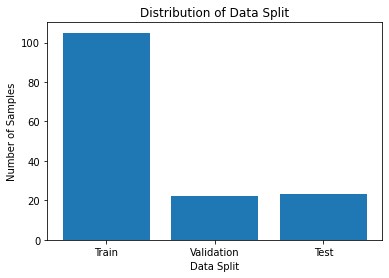

In [2]:
import matplotlib.pyplot as plt

# Calculate the number of samples in each set
train_count = len(train_data)
val_count = len(val_data)
test_count = len(test_data)

# Create a bar plot
plt.bar(['Train', 'Validation', 'Test'], [train_count, val_count, test_count])
plt.xlabel('Data Split')
plt.ylabel('Number of Samples')
plt.title('Distribution of Data Split')
plt.show()

### 2.2 pandas

The pandas library provides a useful function called `sample()`, which allows us to split a data frame into train and test sets. This function takes the `frac` parameter as input, representing the proportion of the dataset to include in the resulting sets. Similar to the `train_test_split()` function in scikit-learn, the `sample()` function also allows us to control the randomization using the random_state parameter.

To extract the training set using the `sample()` function:

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/Iris.csv')

# Set the random seed for reproducibility
np.random.seed(42)

# Define the proportions for train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset into train, validation, and test sets
train_data = data.sample(frac=train_ratio, random_state=42)
remaining_data = data.drop(train_data.index)
val_data = remaining_data.sample(frac=val_ratio/(val_ratio + test_ratio), random_state=42)
test_data = remaining_data.drop(val_data.index)

print("The shape of training set:", train_data.shape)
print("The shape of validation set:",val_data.shape)
print("The shape of test set:",test_data.shape)

The shape of training set: (105, 6)
The shape of validation set: (22, 6)
The shape of test set: (23, 6)


### 2.3 Scikit-learn

In scikit-learn, you can use the `train_test_split()` function to split your dataset into training and test sets. This function can handle input parameters in the form of lists or Pandas DataFrames. 

Here's an example.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/Iris.csv')

from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 70:15:15 for train:valid:test dataset
train_size=0.7

X = data.drop(columns = ['Species']).copy()
y = data['Species']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print("The shape of training set:", X_train.shape, y_train.shape)
print("The shape of validation set:", X_valid.shape, y_valid.shape)
print("The shape of test set:", X_test.shape, y_test.shape)

The shape of training set: (105, 5) (105,)
The shape of validation set: (22, 5) (22,)
The shape of test set: (23, 5) (23,)


### 2.4 Tensorflow
In TensorFlow, you can use the `tf.data.Dataset` API to split your dataset into training and test sets. 

Here's an example.

In [6]:
import tensorflow as tf
import pandas as pd

# Create a sample agriculture dataset
data = pd.DataFrame({
    'temperature': [25.6, 27.3, 29.8, 23.5, 26.9, 24.2, 28.1, 26.7, 25.4, 27.8],
    'humidity': [62, 65, 70, 58, 63, 61, 68, 64, 60, 67],
    'rainfall': [40.2, 45.1, 38.9, 52.6, 42.8, 46.5, 39.2, 44.7, 43.9, 41.5],
    'crop': ['wheat', 'rice', 'maize', 'wheat', 'rice', 'wheat', 'maize', 'rice', 'wheat', 'maize']
})

# Split the dataset into features and labels
features = data.drop(columns=['crop'])
labels = data['crop']

# Combine the features and labels into a single dataset
dataset = tf.data.Dataset.from_tensor_slices((features.values, labels.values))

# Define the proportions for the train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Get the total number of samples
total_samples = len(data)

# Calculate the number of samples for each set
train_samples = int(total_samples * train_ratio)
val_samples = int(total_samples * val_ratio)
test_samples = total_samples - train_samples - val_samples

# Shuffle and split the dataset
dataset = dataset.shuffle(total_samples, reshuffle_each_iteration=False)

train_data = dataset.take(train_samples)
remaining_data = dataset.skip(train_samples)

val_data = remaining_data.take(val_samples)
test_data = remaining_data.skip(val_samples)

# Print the number of samples in each split
print("Number of samples in Train set:", len(list(train_data)))
print("Number of samples in Validation set:", len(list(val_data)))
print("Number of samples in Test set:", len(list(test_data)))

# Define batch size and other parameters
batch_size = 64
shuffle_buffer_size = 1000

# Create data loaders for each split
train_loader = train_data.shuffle(shuffle_buffer_size).batch(batch_size)
val_loader = val_data.batch(batch_size)
test_loader = test_data.batch(batch_size)

Number of samples in Train set: 7
Number of samples in Validation set: 1
Number of samples in Test set: 2


### 2.5 Pytorch

In PyTorch, we can split the dataset starting by defining a custom dataset class to handle data loading and organization. The dataset can then be split into train, validation, and test sets using the `random_split` function, creating separate datasets for each set. Afterward, data loaders are created using the `DataLoader` class, allowing for efficient batched data loading during training or evaluation. The data loaders can be configured with specific batch sizes and the option to shuffle the data.

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

# Assuming you have a custom dataset class named 'AgricultureDataset'
class AgricultureDataset(Dataset):
    def __init__(self):
        # Initialize your dataset here
        self.features = [
            [25.6, 62, 40.2],
            [27.3, 65, 45.1],
            [29.8, 70, 38.9],
            [23.5, 58, 52.6],
            [26.9, 63, 42.8],
            [24.2, 61, 46.5],
            [28.1, 68, 39.2],
            [26.7, 64, 44.7],
            [25.4, 60, 43.9],
            [27.8, 67, 41.5]
        ]
        self.labels = [
            'wheat',
            'rice',
            'maize',
            'wheat',
            'rice',
            'wheat',
            'maize',
            'rice',
            'wheat',
            'maize'
        ]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        feature = torch.tensor(self.features[index], dtype=torch.float32)
        label = self.labels[index]
        return feature, label

# Create an instance of your custom dataset
dataset = AgricultureDataset()

# Define the proportions for the train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Get the total number of samples in the dataset
total_samples = len(dataset)

# Calculate the number of samples for each set
train_samples = int(total_samples * train_ratio)
val_samples = int(total_samples * val_ratio)
test_samples = total_samples - train_samples - val_samples

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_samples, val_samples, test_samples])

# Print the number of samples in each split
print("Number of samples in Train set:", len(train_dataset))
print("Number of samples in Validation set:", len(val_dataset))
print("Number of samples in Test set:", len(test_dataset))

# Create data loaders for each split
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Number of samples in Train set: 7
Number of samples in Validation set: 1
Number of samples in Test set: 2


### 2.6 Data Splitting of Temporal Variables

When working with datasets that include temporal variables, such as dates, and our goal is to make predictions for the future, it is more reliable to use this temporal variable for dataset splitting. This ensures that the validation and test datasets contain the most recent samples. The underlying principle is to select a subset of samples that faithfully represent the data our model will encounter in the future. Here are examples of how to split a time series dataset using the scikit-learn library.

First, let's create a time series dataset.

In [12]:
import pandas as pd
import numpy as np

# Set the start and end dates for the time series
start_date = '2020-01-01'
end_date = '2022-12-31'

# Generate a date range using pandas
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create an empty DataFrame to store the time series data
agriculture_data = pd.DataFrame(index=dates)

# Generate random values for the agriculture data
agriculture_data['Temperature'] = np.random.randint(10, 35, len(dates))
agriculture_data['Rainfall'] = np.random.randint(0, 100, len(dates))
agriculture_data['CropYield'] = np.random.randint(100, 1000, len(dates))

# Add the date column to the DataFrame
agriculture_data['Date'] = agriculture_data.index

# Print the updated DataFrame
print(agriculture_data)

            Temperature  Rainfall  CropYield       Date
2020-01-01           29        92        944 2020-01-01
2020-01-02           23         7        819 2020-01-02
2020-01-03           13        40        300 2020-01-03
2020-01-04           21        18        546 2020-01-04
2020-01-05           26        45        943 2020-01-05
...                 ...       ...        ...        ...
2022-12-27           29        19        176 2022-12-27
2022-12-28           24        89        236 2022-12-28
2022-12-29           27        90        119 2022-12-29
2022-12-30           29        84        539 2022-12-30
2022-12-31           22        81        310 2022-12-31

[1096 rows x 4 columns]


To split the dataset, let us utilize `the train_test_split` function.

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset using sklearn's train_test_split function
train_data, remaining_data = train_test_split(agriculture_data, test_size=val_ratio + test_ratio, shuffle=False)
val_data, test_data = train_test_split(remaining_data, test_size=test_ratio/(val_ratio + test_ratio), shuffle=False)

# Save the datasets as CSV files
train_data.to_csv('train_dataset.csv', index=False)
val_data.to_csv('validation_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)

# Print the shapes of the split datasets
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (767, 4)
Validation data shape: (164, 4)
Test data shape: (165, 4)


Now, let's visualize the results of splitting the time-series dataset.

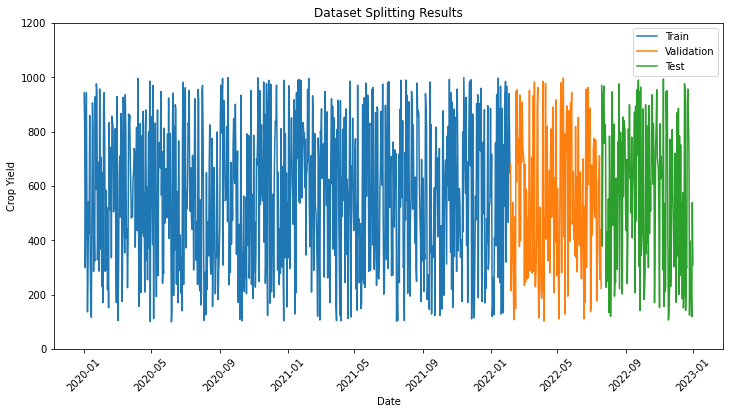

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the train data
ax.plot(train_data.index, train_data['CropYield'], label='Train')

# Plot the validation data
ax.plot(val_data.index, val_data['CropYield'], label='Validation')

# Plot the test data
ax.plot(test_data.index, test_data['CropYield'], label='Test')

# Set the labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Crop Yield')
ax.set_title('Dataset Splitting Results')

# Set the y-axis range
ax.set_ylim(0, 1200)

# Add a legend
ax.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

We can also use the `TimeSeriesSplit` function to split the time series dataset. Here is an example of the code.

In [20]:
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits for TimeSeriesSplit
n_splits = 2

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Iterate over the splits and split the dataset
for train_index, test_index in tscv.split(agriculture_data):
    train_data = agriculture_data.iloc[train_index]
    test_data = agriculture_data.iloc[test_index]
    
    print("Train data shape:", train_data.shape)
    print("Test data shape:", test_data.shape)

Train data shape: (366, 4)
Test data shape: (365, 4)
Train data shape: (731, 4)
Test data shape: (365, 4)


## 3. Conclusion

In conclusion, this notebook has provided insights into the concepts of training, validation, and testing datasets, as well as the scientific principles behind determining the dataset split ratio. Additionally, it has demonstrated practical examples of splitting a dataset into training and test sets using various popular libraries such as pandas, NumPy, scikit-learn, TensorFlow, and PyTorch. Armed with this knowledge, you are now equipped to effectively split datasets for machine learning tasks using the tools and techniques discussed in this notebook.

If you are looking for examples of image dataset splitting, you can find plenty of examples in our deep learning workshops.

***

## Bonus Exercises

We will use the `%load` command to load the content of a specified file into the cell, primarily for the purpose of incorporating solutions once you have finished the exercises.

### E: Data Splitting

In this exercise, you will split a time series dataset using the pandas library. To determine the sizes of each set, you can use the `int` function in combination with the `size` function, like `train_size = int(len(df) * train_ratio)`. Then, you can split the dataset by assigning a subset of the data to a new dataframe, for example, `df_train = df[:train_size]`. 

Now, it is your turn to complete the code and, if desired, visualize the results of the dataset splitting.

In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    'date': ['2023-01-01', '2023-01-05', '2023-01-02', '2023-01-04', '2023-01-03', '2023-01-06', '2023-01-09', '2023-01-07', '2023-01-08', '2023-01-10'],
    'temperature': [25, 23, 22, 20, 24, 18, 19, 21, 20, 22],
    'rainfall': [5, 7, 3, 2, 4, 6, 5, 3, 4, 2],
    'crop_yield': [30, 32, 28, 29, 31, 27, 26, 29, 28, 30]
}

# Create the dataframe
df = pd.DataFrame(data)

# Define the proportions for train, validation, and test sets
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# First we need to sort the dataset by the desired column
df.sort_values(by='date', ascending=True, inplace=True)

# Calculate the sizes of each set
train_size = ```code it```
valid_size = ```code it```
test_size = ```code it```

# Split the dataset into train, validation, and test sets
df_train = ```code it```
df_valid = ```code it```
df_test = ```code it```

**Solution**

In [9]:
%load solutions/04.2_data_splitting

Now, you can visualize the result of your time series data splitting.

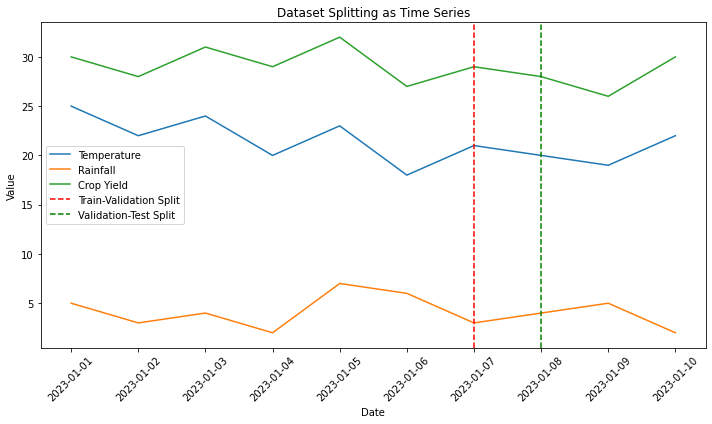

In [10]:
import matplotlib.pyplot as plt

# Plotting the split dataset
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature'], label='Temperature')
plt.plot(df['date'], df['rainfall'], label='Rainfall')
plt.plot(df['date'], df['crop_yield'], label='Crop Yield')
plt.axvline(x=df_train.iloc[-1]['date'], color='r', linestyle='--', label='Train-Validation Split')
plt.axvline(x=df_valid.iloc[-1]['date'], color='g', linestyle='--', label='Validation-Test Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Dataset Splitting as Time Series')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()